# Bike Shared Assignment

## Step 1: Reading and Understanding The Data

In [1066]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [1067]:
# Loading data from data file to dataframe
data = pd.read_csv('day.csv')

# Checking the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [1068]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


***There is not any null data found

In [1069]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Exploratory Data Analysis (EDA)

### Visualising Numeric Variables
Making a pairplot of all the numberic variable

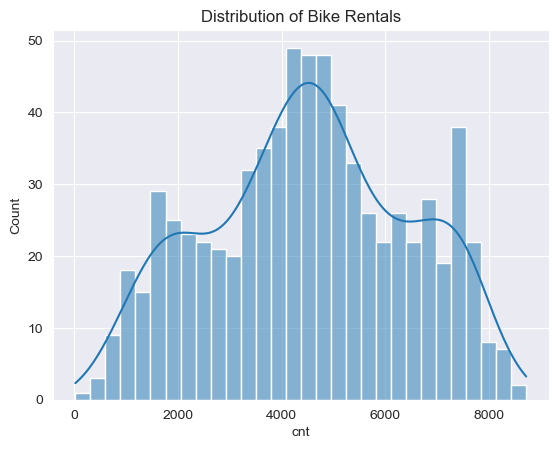

In [1070]:
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.show()

The data is approximately normal.

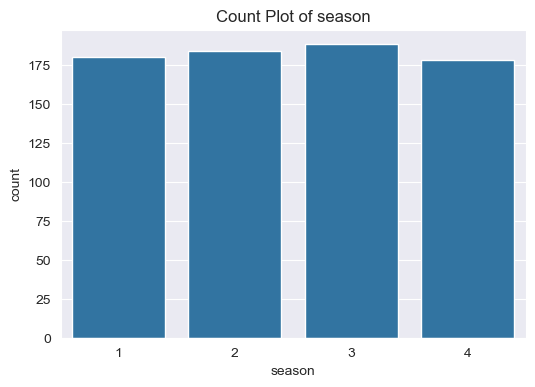

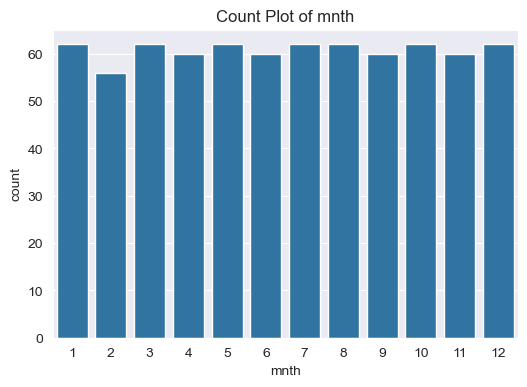

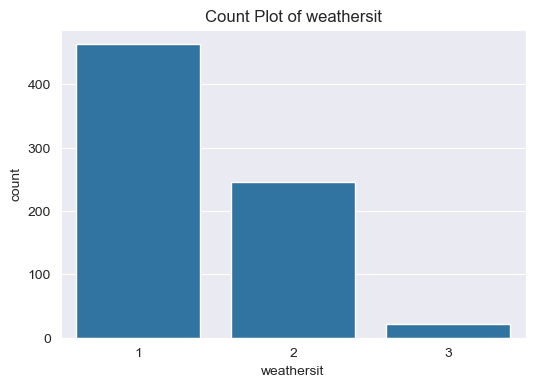

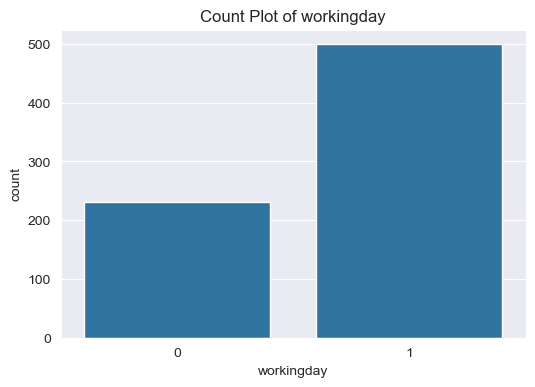

In [1071]:
# Count plots for categorical variables
categorical_vars = ["season", "mnth", "weathersit", "workingday"]
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, data=data)
    plt.title(f"Count Plot of {var}")
    plt.show()

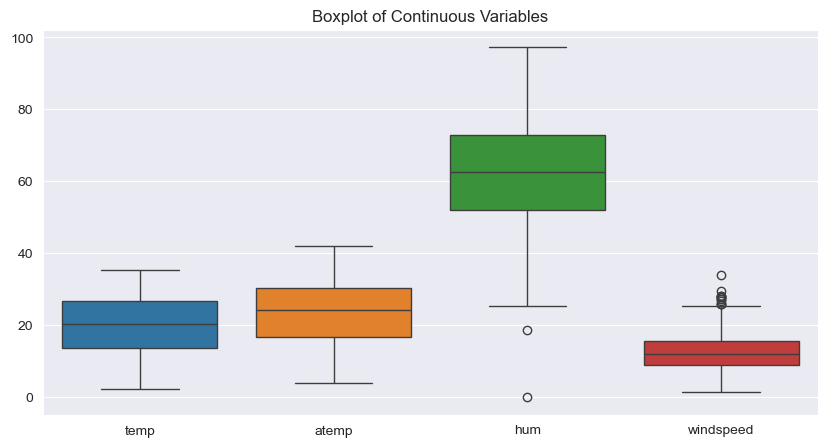

In [1072]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['temp', 'atemp', 'hum', 'windspeed']])
plt.title("Boxplot of Continuous Variables")
plt.show()

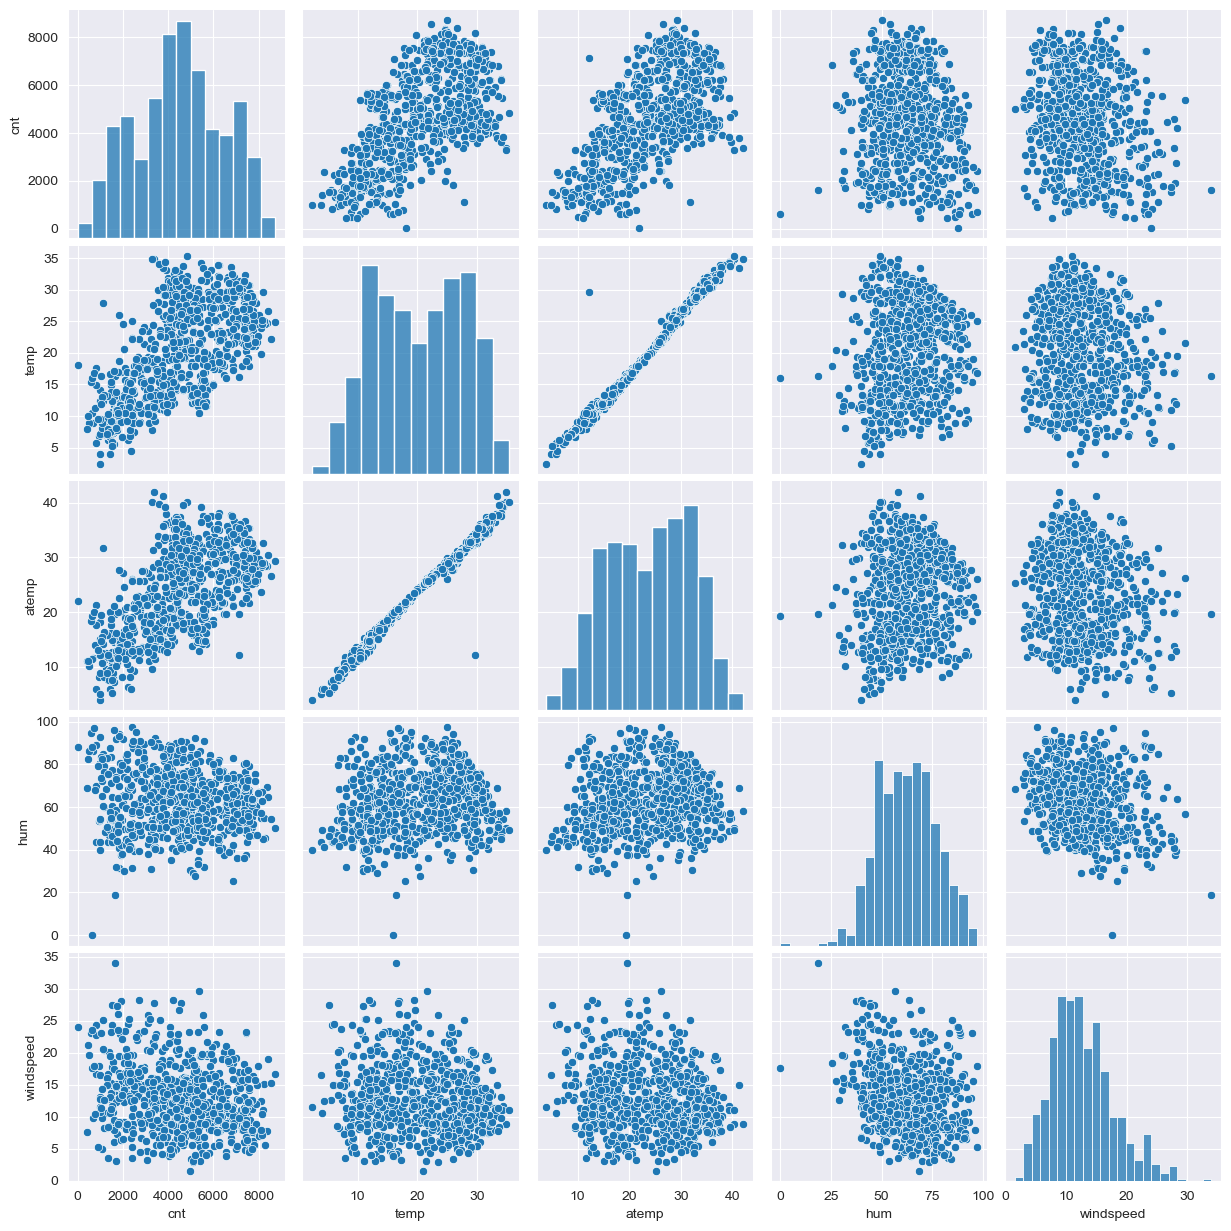

In [1073]:
sns.pairplot(data, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

## Step 3: Preprocessing the Data

The "instant" column is merely an index for each record in the dataset and contains no meaningful information related to bike demand. Removing this column will not affect the model or data analysis

In [1074]:
drop_columns = ['instant', 'dteday']

column 'cnt' count of total rental bikes including both casual and registered then we can drop 'casual' and 'registered' as they are not needed


In [1075]:
drop_columns.extend(['casual', 'registered'])
print(drop_columns)
# data.drop(drop_columns, axis=1, inplace=True)
data.drop(columns=drop_columns, inplace=True)

['instant', 'dteday', 'casual', 'registered']


In [1076]:
# Get the dummy variables for the feature 'season'

# season_dummies = pd.get_dummies(data['season'], drop_first=True).astype(int)
# season_dummies.head()

In [1077]:
# Add the results to the original dataframe
# data = pd.concat([data, season_dummies], axis=1)
# # Drop the 'season' column from the dataframe
# data.drop(["season"], axis=1, inplace=True)
# data.head()

In [1078]:

# weathersit_dummies = pd.get_dummies(data["weathersit"], drop_first=True).astype(int)
# weathersit_dummies.head()

There is no 'Heavy Rain/Snow' data record found.

In [1079]:
# Add the results to the original dataframe
# data = pd.concat([data, weathersit_dummies], axis=1)
# # Drop the 'weathersit' column from the dataframe
# data.drop(["weathersit"], axis=1, inplace=True)
# data.head()

In [1080]:
# Convert categorical columns to meaningful labels
data["season"] = data["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
data["weathersit"] = data["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"})
data["yr"] = data["yr"].map({0: "2018", 1: "2019"})

# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=["season", "weathersit", "yr", "mnth", "weekday"], drop_first=True).astype(int)

### Move the 'cnt' to the first column for better view

In [1081]:
cnt_col = data.pop("cnt")  # Remove and store 'cnt'
data.insert(0, "cnt", cnt_col)

## Step 4: Splitting the Data into Trainning and Testing Sets

In [1082]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

## Rescaling the Feature

In [1083]:
data.head()

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,985,0,0,14,18,80,10,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,801,0,0,14,17,69,16,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1349,0,1,8,9,43,16,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1562,0,1,8,10,59,10,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1600,0,1,9,11,43,12,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1084]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_variables = ['cnt','temp', 'atemp', 'hum', 'windspeed']

In [1085]:
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])
df_train.head()

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
367,0.254717,0,1,0.121212,0.076923,0.453608,0.68750,1,0,0,...,0,0,0,0,0,1,0,0,0,0
648,0.868385,0,1,0.454545,0.461538,0.474227,0.31250,0,0,1,...,0,1,0,0,0,0,0,1,0,0
44,0.217556,0,1,0.454545,0.410256,0.381443,0.78125,1,0,0,...,0,0,0,0,1,0,0,0,0,0
705,0.573631,0,1,0.333333,0.333333,0.783505,0.18750,0,0,1,...,0,0,0,1,0,0,0,0,1,0
379,0.263346,0,0,0.121212,0.128205,0.422680,0.43750,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1086]:
df_train.describe()

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.515792,0.027397,0.667808,0.533364,0.512294,0.644824,0.321543,0.251712,0.246575,0.250000,...,0.080479,0.092466,0.080479,0.087329,0.148973,0.133562,0.154110,0.135274,0.123288,0.150685
std,0.225336,0.163378,0.471403,0.224576,0.206956,0.144213,0.163741,0.434369,0.431387,0.433384,...,0.272267,0.289931,0.272267,0.282558,0.356367,0.340472,0.361363,0.342309,0.329049,0.358048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350696,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.522837,0.000000,1.000000,0.545455,0.538462,0.649485,0.312500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.691872,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Let's check the correlation coefficients to see which variables are highly correlated

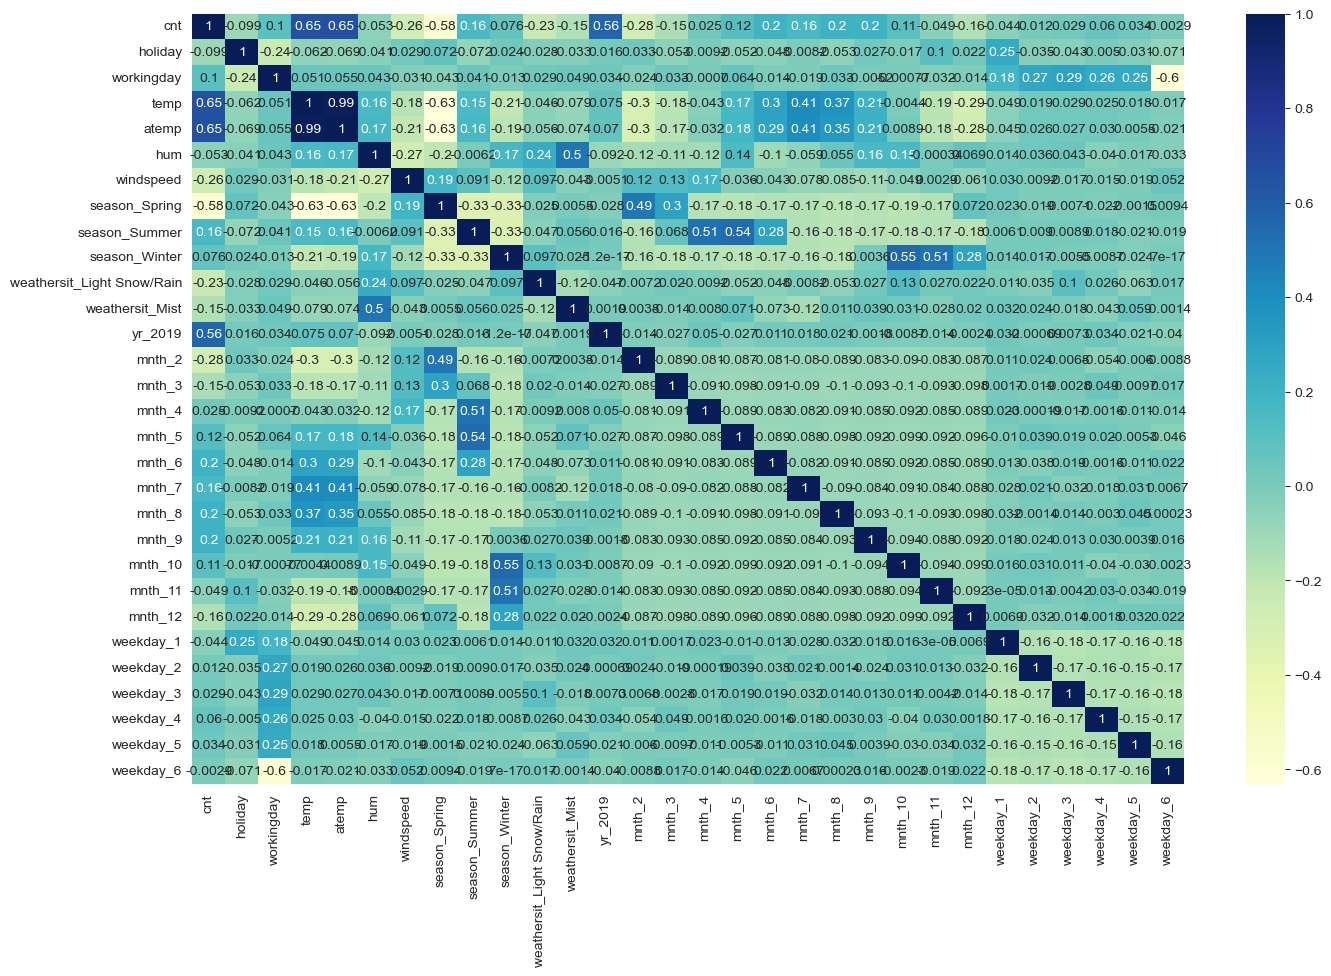

In [1087]:
  # Insert 'cnt' at index 0

plt.figure(figsize = (16, 10))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

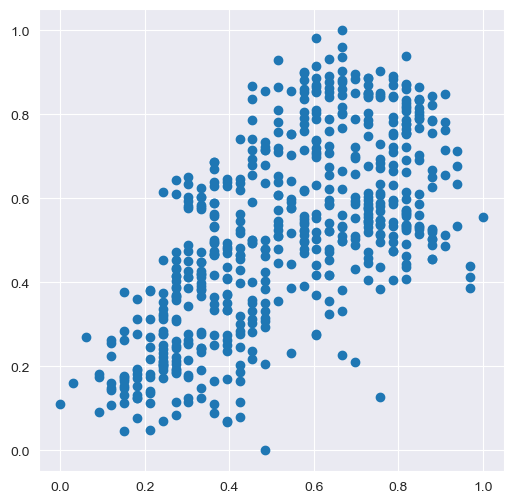

In [1088]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [1089]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [1090]:
import statsmodels.api as sm


In [1091]:
# Function to get variables with high p-value
def get_high_pvalue_variables(model, threshold=0.05):
    high_pvalues = model.pvalues[model.pvalues > threshold].sort_values(ascending=False)
    print("High P-Value List with threshold:", threshold)
    return high_pvalues

In [1092]:
# Function to build and summarize OLS model
def build_ols_model(X_train, y_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    return lr

### Adding all the variables to the model

In [1093]:
# Build a linear model
model = build_ols_model(X_train, y_train)
get_high_pvalue_variables(model)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     119.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          9.93e-215
Time:                        06:04:52   Log-Likelihood:                 612.08
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     555   BIC:                            -1039.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

mnth_11          0.715351
mnth_12          0.699081
weekday_4        0.578236
weekday_3        0.452763
mnth_7           0.449713
weekday_2        0.409672
atemp            0.288049
weekday_1        0.242445
weekday_5        0.139938
season_Summer    0.103355
mnth_2           0.099061
holiday          0.053956
mnth_4           0.051406
dtype: float64

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [1094]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def compute_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif
print(compute_vif(df_train))

                      Features     VIF
0                      holiday     inf
27                   weekday_5     inf
1                   workingday     inf
23                   weekday_1     inf
24                   weekday_2     inf
25                   weekday_3     inf
26                   weekday_4     inf
2                         temp  414.50
3                        atemp  383.33
4                          hum   32.98
8                season_Winter    9.53
7                season_Summer    9.12
18                      mnth_8    7.76
6                season_Spring    7.31
17                      mnth_7    7.22
15                      mnth_5    7.15
16                      mnth_6    6.51
20                     mnth_10    6.10
5                    windspeed    5.68
19                      mnth_9    5.52
14                      mnth_4    5.17
21                     mnth_11    4.69
22                     mnth_12    3.17
13                      mnth_3    2.79
10             weathersit

In [1095]:
def build_and_visualize_ols_model(X_train, y_train):
    # Build a linear model
    model = build_ols_model(X_train, y_train)
    print(get_high_pvalue_variables(model))
    print("VIF")
    print(compute_vif(df_train))
    return model

Identify 'weekday_4' is both high p-value and VIF. Let's drop this variable

In [1096]:
X_train.drop('weekday_4', axis=1, inplace=True)

In [1097]:
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     119.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          9.93e-215
Time:                        06:04:53   Log-Likelihood:                 612.08
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     555   BIC:                            -1039.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'mnth_7' is both high p-value and VIF. Let's drop this variable

In [1098]:
X_train.drop('mnth_7', axis=1, inplace=True)

In [1099]:
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     124.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.17e-215
Time:                        06:04:53   Log-Likelihood:                 611.78
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     556   BIC:                            -1045.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'atemp' is both high p-value and VIF. Let's drop this variable

In [1100]:
X_train.drop('atemp', axis=1, inplace=True)

In [1101]:
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     129.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.77e-216
Time:                        06:04:53   Log-Likelihood:                 611.20
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     557   BIC:                            -1050.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'season_Summer' is both high p-value and VIF. Let's drop this variable

In [1102]:
X_train.drop('season_Summer', axis=1, inplace=True)

In [1103]:
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.75e-217
Time:                        06:04:54   Log-Likelihood:                 609.99
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     558   BIC:                            -1054.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'mnth_12' is high p-value but low VIF. Let's drop this variable first then see

In [1104]:
X_train.drop('mnth_12', axis=1, inplace=True)


In [1105]:
build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     139.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.98e-218
Time:                        06:04:54   Log-Likelihood:                 609.99
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     559   BIC:                            -1061.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'weekday_3' is high p-value but low VIF. Let's drop this variable first then see

In [1106]:
X_train.drop('weekday_3', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.28e-219
Time:                        06:04:54   Log-Likelihood:                 609.99
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     560   BIC:                            -1067.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'mnth_11' is high p-value but low VIF. Let's drop this variable first then see

In [1107]:
X_train.drop('mnth_11', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     152.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.64e-220
Time:                        06:04:54   Log-Likelihood:                 609.98
No. Observations:                 584   AIC:                            -1174.
Df Residuals:                     561   BIC:                            -1073.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'weekday_5' is high p-value but low VIF. Let's drop this variable first then see

In [1108]:
X_train.drop('weekday_5', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.55e-221
Time:                        06:04:55   Log-Likelihood:                 609.75
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     562   BIC:                            -1079.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'holiday' is high p-value but low VIF. Let's drop this variable first then see

In [1109]:
X_train.drop('holiday', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.51e-222
Time:                        06:04:55   Log-Likelihood:                 608.87
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     563   BIC:                            -1084.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'weekday_2' is high p-value but low VIF. Let's drop this variable first then see

In [1110]:
X_train.drop('weekday_2', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     176.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.23e-222
Time:                        06:04:56   Log-Likelihood:                 607.52
No. Observations:                 584   AIC:                            -1175.
Df Residuals:                     564   BIC:                            -1088.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'mnth_2' is high p-value but low VIF. Let's drop this variable first then see

In [1111]:
X_train.drop('mnth_2', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.87e-223
Time:                        06:04:56   Log-Likelihood:                 605.75
No. Observations:                 584   AIC:                            -1173.
Df Residuals:                     565   BIC:                            -1090.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'weekday_1' is high p-value but low VIF. Let's drop this variable first then see

In [1112]:
X_train.drop('weekday_1', axis=1, inplace=True)
lr = build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     194.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.16e-223
Time:                        06:04:56   Log-Likelihood:                 603.84
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     566   BIC:                            -1093.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'hum' is low p-value but high VIF. Let's drop this variable

In [1113]:
X_train.drop('hum', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.60e-221
Time:                        06:04:56   Log-Likelihood:                 595.32
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     567   BIC:                            -1082.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Identify 'temp' is low p-value but high VIF. Let's drop this variable

In [1114]:
temp_column = X_train[['temp']]  # Save the temp column before dropping
X_train.drop('temp', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.62e-187
Time:                        06:04:56   Log-Likelihood:                 512.43
No. Observations:                 584   AIC:                            -992.9
Df Residuals:                     568   BIC:                            -922.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Impact on Model Performance
    - R-squared dropped significantly: 0.850 → 0.800
    - Adjusted R-squared dropped: 0.845 → 0.795
    - F-statistic decreased: 200.2 → 151.7 (model is still significant, but weaker)

Removing `temp` has a negative impact on model performance. The model explains 5% less variance, indicating a less optimal fit.

All VIF values are now below 5, meaning multicollinearity is no longer an issue.

Indentify `mnth_4` has p-value = 0.668 (not statistically significant)

Decision to Keep temp in the model because
    - `temp` is an important predictor, and removing it weakens the model significantly.
    - Multicollinearity is reduced but at too high a cost. This could be a tradeoff and `mnth4` could be removed to and let's see how it improve VIF of `temp`

Add `temp` back and drop `mnth_4`

In [1115]:
X_train['temp'] = temp_column

In [1116]:
X_train.drop('mnth_4', axis=1, inplace=True)
build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     207.5
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.49e-219
Time:                        06:04:57   Log-Likelihood:                 587.79
No. Observations:                 584   AIC:                            -1144.
Df Residuals:                     568   BIC:                            -1074.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Now, `mnth_8` is high p-value but low VIF so it should be dropped too

In [1117]:
X_train.drop('mnth_8', axis=1, inplace=True)
lr = build_and_visualize_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     221.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.61e-219
Time:                        06:04:57   Log-Likelihood:                 586.25
No. Observations:                 584   AIC:                            -1143.
Df Residuals:                     569   BIC:                            -1077.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Finally, let's use this model while accepting the trade-off that `temp` still has a VIF above **5**. However, the model remains **strong** and **well-fitted**.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

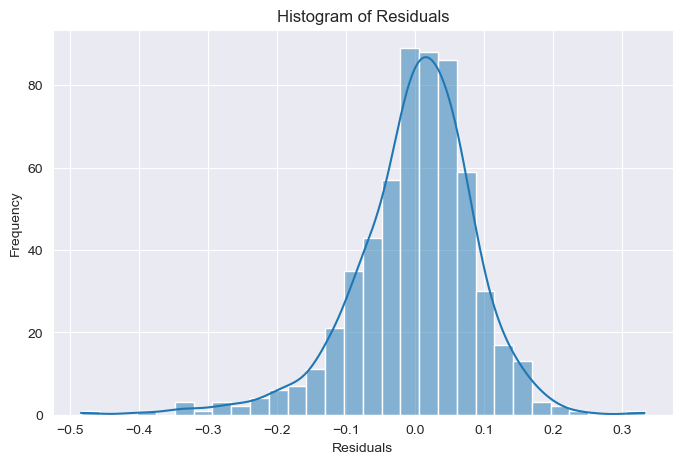

In [1118]:
X_train_lm = sm.add_constant(X_train)
y_train_cnt = lr.predict(X_train_lm)# Predicted values
residuals = y_train - y_train_cnt  # Actual - Predicted

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

The histogram of residuals displays **roughly bell-shaped and symmetric**, which suggests that the residuals are **approximately normally distributed**. It can go ahead to use this model.

## Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

Check the variable for scaling

In [1119]:
num_variables

['cnt', 'temp', 'atemp', 'hum', 'windspeed']

Apply the scaling on the test sets

In [1120]:
df_test[num_variables] = scaler.transform(df_test[num_variables])
df_test.describe()

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.517368,0.034247,0.746575,0.564965,0.542677,0.631479,0.317423,0.226027,0.273973,0.219178,...,0.089041,0.054795,0.089041,0.075342,0.123288,0.178082,0.089041,0.171233,0.219178,0.116438
std,0.212757,0.182488,0.436469,0.237935,0.217301,0.156422,0.156946,0.419697,0.447530,0.415114,...,0.285783,0.228362,0.285783,0.264852,0.329899,0.383899,0.285783,0.378009,0.415114,0.321854
min,0.055683,0.000000,0.000000,0.030303,0.025641,0.257732,-0.031250,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.391251,0.000000,0.250000,0.363636,0.358974,0.528351,0.195312,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.508916,0.000000,1.000000,0.545455,0.538462,0.608247,0.312500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.649994,0.000000,1.000000,0.787879,0.743590,0.721649,0.406250,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.963300,1.000000,1.000000,0.969697,0.974359,1.000000,0.781250,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [1121]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1122]:
# Get the list of columns from the trained model
model_features = list(X_train.columns)

# Ensure X_test contains only those columns
X_test = X_test[model_features]

# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [1123]:
# Making predictions using the fourth model

y_pred = lr.predict(X_test_m)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [1124]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared (R²) for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R² Score: {r2}")

Test MSE: 0.009699696555510246
Test R² Score: 0.7842377063616728


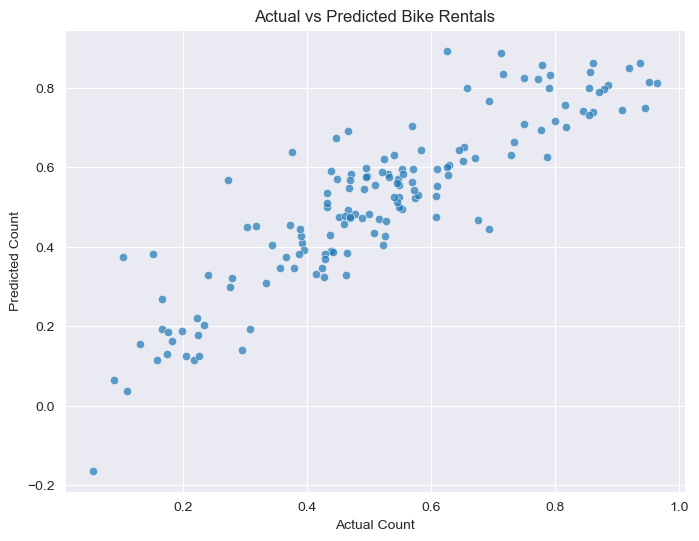

In [1125]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()

Check Feature Importance using Recursive Feature Elimination (RFE)

,workingday,windspeed,season_Spring,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist,yr_2019,mnth_3,mnth_5,mnth_6,mnth_9,mnth_10,weekday_6,temp
367,1,0.68750,1,0,0,0,1,0,0,0,0,0,0,0.121212
648,1,0.31250,0,1,0,0,1,0,0,0,0,1,0,0.454545
44,1,0.78125,1,0,0,0,0,0,0,0,0,0,0,0.454545
705,1,0.18750,0,1,0,1,1,0,0,0,0,0,0,0.333333
379,0,0.43750,1,0,0,0,1,0,0,0,0,0,0,0.121212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.18750,0,0,0,0,1,0,0,0,0,0,0,0.848485
53,1,0.12500,1,0,0,0,0,0,0,0,0,0,0,0.212121
350,0,0.43750,0,1,0,1,0,0,0,0,0,0,1,0.242424
79,1,0.53125,0,0,0,1,0,1,0,0,0,0,0,0.454545


In [1127]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [1128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_variables = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])
df_train.head()

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
367,0.254717,0,1,0.121212,0.076923,0.453608,0.68750,1,0,0,...,0,0,0,0,0,1,0,0,0,0
648,0.868385,0,1,0.454545,0.461538,0.474227,0.31250,0,0,1,...,0,1,0,0,0,0,0,1,0,0
44,0.217556,0,1,0.454545,0.410256,0.381443,0.78125,1,0,0,...,0,0,0,0,1,0,0,0,0,0
705,0.573631,0,1,0.333333,0.333333,0.783505,0.18750,0,0,1,...,0,0,0,1,0,0,0,0,1,0
379,0.263346,0,0,0.121212,0.128205,0.422680,0.43750,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1129]:
df_test[num_variables] = scaler.transform(df_test[num_variables])
df_test.describe()

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.517368,0.034247,0.746575,0.564965,0.542677,0.631479,0.317423,0.226027,0.273973,0.219178,...,0.089041,0.054795,0.089041,0.075342,0.123288,0.178082,0.089041,0.171233,0.219178,0.116438
std,0.212757,0.182488,0.436469,0.237935,0.217301,0.156422,0.156946,0.419697,0.447530,0.415114,...,0.285783,0.228362,0.285783,0.264852,0.329899,0.383899,0.285783,0.378009,0.415114,0.321854
min,0.055683,0.000000,0.000000,0.030303,0.025641,0.257732,-0.031250,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.391251,0.000000,0.250000,0.363636,0.358974,0.528351,0.195312,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.508916,0.000000,1.000000,0.545455,0.538462,0.608247,0.312500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.649994,0.000000,1.000000,0.787879,0.743590,0.721649,0.406250,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.963300,1.000000,1.000000,0.969697,0.974359,1.000000,0.781250,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train = df_train.pop('price')
X_train = df_train

In [1141]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=30)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]

In [1136]:
selected_features

Index(['workingday', 'windspeed', 'season_Spring',
       'weathersit_Light Snow/Rain', 'weathersit_Mist', 'yr_2019', 'mnth_9',
       'mnth_10', 'weekday_6', 'temp'],
      dtype='object')

In [1138]:
df_train

,cnt,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
367,0.254717,0,1,0.121212,0.076923,0.453608,0.68750,1,0,0,...,0,0,0,0,0,1,0,0,0,0
648,0.868385,0,1,0.454545,0.461538,0.474227,0.31250,0,0,1,...,0,1,0,0,0,0,0,1,0,0
44,0.217556,0,1,0.454545,0.410256,0.381443,0.78125,1,0,0,...,0,0,0,0,1,0,0,0,0,0
705,0.573631,0,1,0.333333,0.333333,0.783505,0.18750,0,0,1,...,0,0,0,1,0,0,0,0,1,0
379,0.263346,0,0,0.121212,0.128205,0.422680,0.43750,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.832835,0,1,0.848485,0.820513,0.670103,0.18750,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53,0.218017,0,1,0.212121,0.230769,0.432990,0.12500,1,0,0,...,0,0,0,0,0,0,1,0,0,0
350,0.312586,0,0,0.242424,0.230769,0.577320,0.43750,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79,0.236424,0,1,0.454545,0.435897,0.752577,0.53125,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1143]:
# y_test = df_test.pop('cnt')
# X_test = df_test
# Use only the selected features for training and testing
X_train_rfe = X_train[selected_features]
X_test_rfe = df_test[selected_features]

# Train model using selected features
model.fit(X_train_rfe, y_train)

# Predict on test data
y_pred = model.predict(X_test_rfe)


In [1144]:
# Calculate MSE and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R² Score: {r2}")

Test MSE: 0.009699696555510248
Test R² Score: 0.7842377063616728
